In [2]:
from dataset import MosquitoDataset
from model import build_SSD
from train import train
from utils import plot_losses, plot_predictions, get_metrics

import torch
from torch.utils.data import DataLoader
import os


# Aug Dataset

In [2]:
datafolder = "aug_dataset"
batch_size = 8
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train", img_size=300)
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val", img_size=300)
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test", img_size=300)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [3]:
model = build_SSD(num_classes=7) # 6 mosquito classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [4]:
N_epochs = 10
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 142/142 [01:59<00:00,  1.19it/s]


Best model saved with val loss: 4.1901
Epoch [1/10] | Train Loss: 5.4771 | Val Loss: 4.1901 | Time: 15 min 16 s


100%|██████████| 142/142 [02:09<00:00,  1.10it/s]


Best model saved with val loss: 3.6239
Epoch [2/10] | Train Loss: 3.7813 | Val Loss: 3.6239 | Time: 14 min 18 s


100%|██████████| 142/142 [02:14<00:00,  1.06it/s]


Best model saved with val loss: 3.3048
Epoch [3/10] | Train Loss: 3.3379 | Val Loss: 3.3048 | Time: 17 min 25 s


100%|██████████| 142/142 [02:05<00:00,  1.13it/s]


Best model saved with val loss: 2.9457
Epoch [4/10] | Train Loss: 2.7678 | Val Loss: 2.9457 | Time: 16 min 59 s


100%|██████████| 142/142 [02:08<00:00,  1.10it/s]


Best model saved with val loss: 2.8859
Epoch [5/10] | Train Loss: 2.6091 | Val Loss: 2.8859 | Time: 16 min 36 s


100%|██████████| 142/142 [02:05<00:00,  1.14it/s]


Best model saved with val loss: 2.7999
Epoch [6/10] | Train Loss: 2.4720 | Val Loss: 2.7999 | Time: 16 min 49 s


100%|██████████| 142/142 [01:57<00:00,  1.21it/s]


Best model saved with val loss: 2.7655
Epoch [7/10] | Train Loss: 2.3339 | Val Loss: 2.7655 | Time: 15 min 14 s


100%|██████████| 142/142 [01:51<00:00,  1.28it/s]


Best model saved with val loss: 2.7621
Epoch [8/10] | Train Loss: 2.3089 | Val Loss: 2.7621 | Time: 14 min 21 s


100%|██████████| 142/142 [01:42<00:00,  1.38it/s]


Best model saved with val loss: 2.7492
Epoch [9/10] | Train Loss: 2.2922 | Val Loss: 2.7492 | Time: 12 min 17 s


100%|██████████| 142/142 [01:36<00:00,  1.47it/s]


Best model saved with val loss: 2.7490
Epoch [10/10] | Train Loss: 2.2758 | Val Loss: 2.7490 | Time: 11 min 37 s


Loss plot saved to plots/aug_dataset/


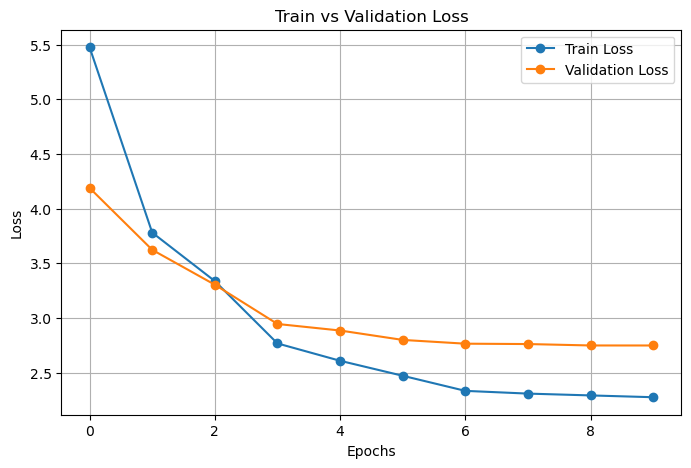

In [5]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)

In [6]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_54556\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "bes

<All keys matched successfully>

Plot saved at: plots/aug_dataset/predictions_vs_ground_truth.png


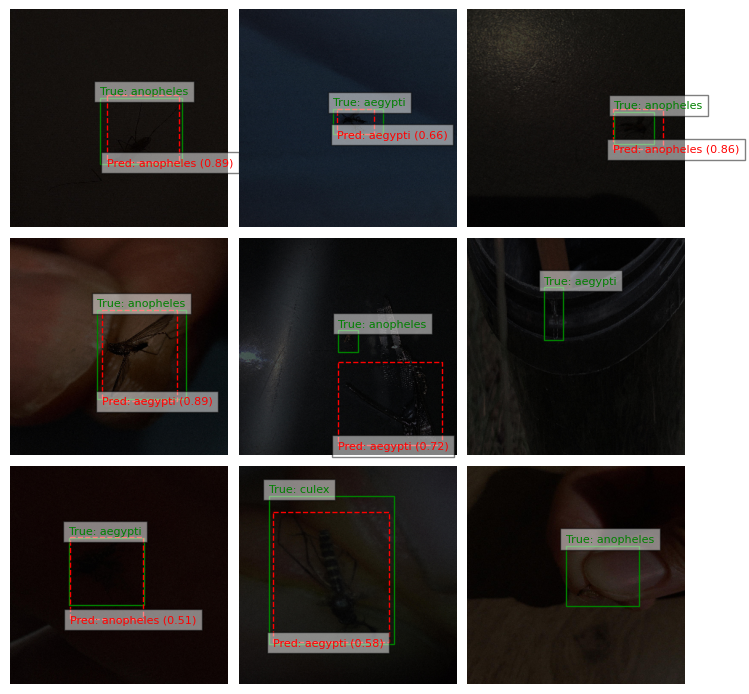

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)

In [8]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 66/66 [01:12<00:00,  1.10s/it]

F1 Score: 0.7028, mAP: 0.7833, Composite mAP-F1: 0.7431, Precision: 0.7322, Recall: 0.6757


# Augmented and Illuminated dataset

In [3]:
datafolder = "aug_il_dataset"
batch_size = 8
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train", img_size=300)
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val", img_size=300)
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test", img_size=300)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [4]:
model = build_SSD(num_classes=7) # 6 mosquito classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [5]:
N_epochs = 10
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 142/142 [01:26<00:00,  1.65it/s]


Best model saved with val loss: 4.0295
Epoch [1/10] | Train Loss: 5.3451 | Val Loss: 4.0295 | Time: 13 min 47 s


100%|██████████| 142/142 [01:17<00:00,  1.83it/s]


Best model saved with val loss: 3.5219
Epoch [2/10] | Train Loss: 3.6651 | Val Loss: 3.5219 | Time: 9 min 38 s


100%|██████████| 142/142 [01:17<00:00,  1.84it/s]


Best model saved with val loss: 3.2033
Epoch [3/10] | Train Loss: 3.1868 | Val Loss: 3.2033 | Time: 9 min 36 s


100%|██████████| 142/142 [01:17<00:00,  1.84it/s]


Best model saved with val loss: 2.8267
Epoch [4/10] | Train Loss: 2.4723 | Val Loss: 2.8267 | Time: 9 min 37 s


100%|██████████| 142/142 [02:11<00:00,  1.08it/s]


Best model saved with val loss: 2.7759
Epoch [5/10] | Train Loss: 2.2973 | Val Loss: 2.7759 | Time: 10 min 27 s


100%|██████████| 142/142 [02:09<00:00,  1.10it/s]


Epoch [6/10] | Train Loss: 2.1761 | Val Loss: 2.7821 | Time: 15 min 31 s


100%|██████████| 142/142 [02:25<00:00,  1.02s/it]


Best model saved with val loss: 2.7576
Epoch [7/10] | Train Loss: 2.0406 | Val Loss: 2.7576 | Time: 15 min 59 s


100%|██████████| 142/142 [02:15<00:00,  1.05it/s]


Best model saved with val loss: 2.7553
Epoch [8/10] | Train Loss: 2.0209 | Val Loss: 2.7553 | Time: 15 min 45 s


100%|██████████| 142/142 [01:19<00:00,  1.78it/s]


Best model saved with val loss: 2.7531
Epoch [9/10] | Train Loss: 2.0085 | Val Loss: 2.7531 | Time: 12 min 56 s


100%|██████████| 142/142 [01:41<00:00,  1.40it/s]

Epoch [10/10] | Train Loss: 1.9952 | Val Loss: 2.7541 | Time: 11 min 32 s


Loss plot saved to plots/aug_il_dataset/


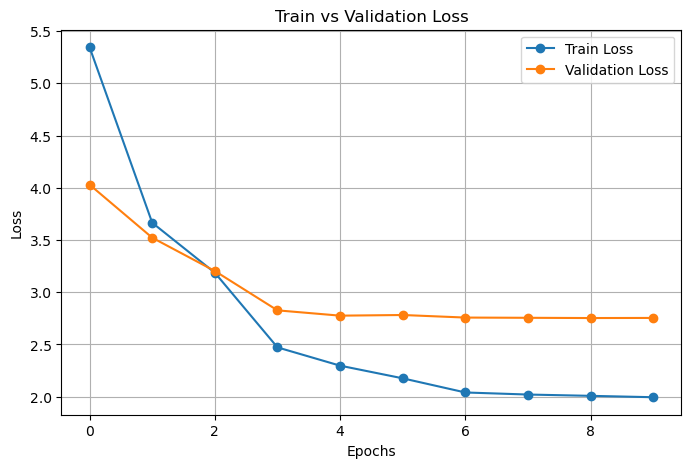

In [6]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)

In [7]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_84712\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "bes

<All keys matched successfully>

Plot saved at: plots/aug_il_dataset/predictions_vs_ground_truth.png


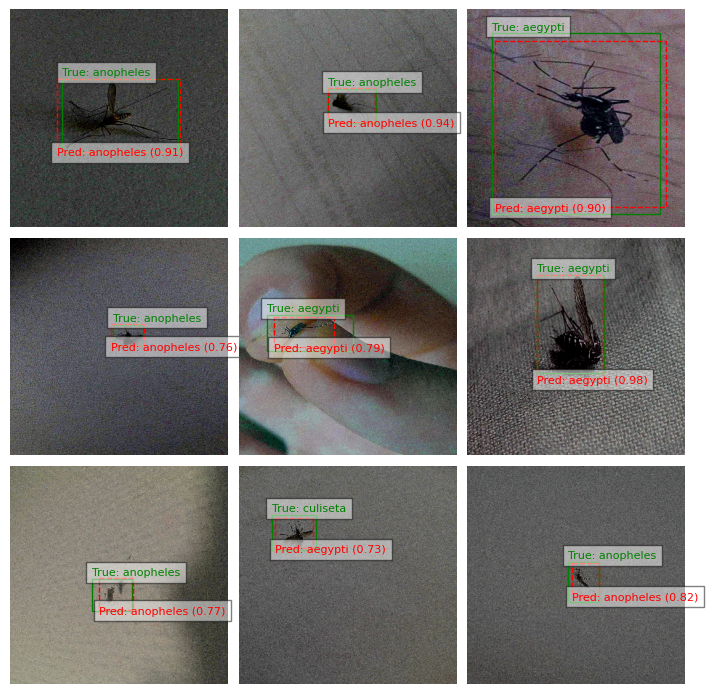

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)

In [9]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 66/66 [00:56<00:00,  1.17it/s]

F1 Score: 0.7677, mAP: 0.8065, Composite mAP-F1: 0.7871, Precision: 0.7560, Recall: 0.7798
